In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Data Cleaning

In [2]:
#imports the dataset via download link, originally found at: https://www.govdata.de/web/guest/suchen/-/details/verdienstunterschiede-von-frauen-und-mannern-nach-landern
df_1 = pd.read_excel("https://www.daten.bmfsfj.de/resource/blob/132014/0873e0048f93dd715dd0e99800df5917/datei-verdienstunterschiede-von-frauen-und-maennern-laendern-data.xlsx", header = 1)

In [3]:
#to get a first look on how the dataset looks; you can see that the formatting needs to be changed in order to see the data correctly
display(df_1)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %
...,...,...,...,...
191,"Verdienststrukturerhebung 2006, 2010, 2014, 20...",NaN,NaN,NaN
192,NaN,NaN,NaN,NaN
193,Datenproduzent:,NaN,NaN,NaN
194,NaN,NaN,NaN,NaN


In [4]:
#my first step is to delete every NaN value, because these are no real missing data values but rather due to formatting
df_1 = df_1.dropna()

In [5]:
#my next step is creating a proper header row 
#because I couldn't find a way to do it on my own, I used the third example from here: https://www.codegrepper.com/tpc/delete+header+row+from+dataframe+python
new_header = df_1.iloc[0] #grab the first row for the header
df_1 = df_1[1:] #take the data less the header row
df_1.columns = new_header #set the header row as the df header
display(df_1)

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %
5,08,Baden-Württemberg,2021,22
6,09,Bayern,2021,21
7,11,Berlin,2021,10
8,12,Brandenburg,2021,5
9,04,Bremen,2021,22
...,...,...,...,...
169,10,Saarland,2007,26
170,14,Sachsen,2007,9
171,15,Sachsen-Anhalt,2007,3
172,01,Schleswig Holstein,2007,18


In [6]:
#to enrich the data, I want to combine 3 datasets, so next I'm going to import the second dataset

In [7]:
#originally found at: https://www.govdata.de/web/guest/suchen/-/details/oberste-fuhrungspositionen-in-der-privatwirtschaft-nach-geschlecht-und-landern
df_2 = pd.read_excel('https://www.daten.bmfsfj.de/resource/blob/131640/b47fd0ef7a87618cf0b69bdeeee60edb/datei-fuehrungspositionen-privatwirtschaft-data.xlsx', header = 1)
display(df_2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Länderschlüssel,Bundesland,Jahr,insgesamt,darunter Frauen,Frauenanteil in %,darunter Männer,Männeranteil in %
...,...,...,...,...,...,...,...,...
118,* Angaben zu Männern berechnet durch das Bunde...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,Datenproduzent:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#because this dataset has the same problems as the first one, I'm doing all the steps again for this one
#Starting by deleting all NaN values
df_2 = df_2.dropna()

In [9]:
#now I'm creating a proper header row
new_header_2 = df_2.iloc[0] 
df_2 = df_2[1:] 
df_2.columns = new_header_2
display(df_2)

4,Länderschlüssel,Bundesland,Jahr,insgesamt,darunter Frauen,Frauenanteil in %,darunter Männer,Männeranteil in %
5,08,Baden-Württemberg,2020,349484,98746,28.3,250738,71.7
6,09,Bayern,2020,449620,119266,26.5,330354,73.5
7,11,Berlin,2020,123995,34103,27.5,89892,72.5
8,12,Brandenburg,2020,72374,22068,30.5,50306,69.5
9,04,Bremen,2020,20920,5541,26.5,15379,73.5
...,...,...,...,...,...,...,...,...
96,14,Sachsen,2008,121281,38106,31.4,83175,68.6
97,15,Sachsen-Anhalt,2008,60939,19271,31.6,41668,68.4
98,01 / 02,Schleswig-Holstein / Hamburg 1),2008,140004.9,33705.5,24.1,106299.4,75.9
99,16,Thüringen,2008,64803,17607,27.2,47196,72.8


In [10]:
#originally found at: https://www.govdata.de/web/guest/suchen/-/details/zweite-ebene-der-fuhrungspositionen-in-der-privatwirtschaft-nach-geschlecht-und-landern
df_3 = pd.read_excel('https://www.daten.bmfsfj.de/resource/blob/131654/83b133fd8ac697587871e2a78c7d78d8/datei-fuehrungspositionen-2-ebene-data.xlsx', header = 1)
display(df_3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Länderschlüssel,Bundesland,Jahr,insgesamt,darunter Frauen,Frauenanteil in %,darunter Männer,Männeranteil in %
...,...,...,...,...,...,...,...,...
118,* Angaben zu Männern berechnet durch das Bunde...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,Datenproduzent:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#this dataset has the same problems, so I'm going to delete every NaN value
df_3 = df_3.dropna()

In [12]:
#here I also need to create a proper header row
new_header_3 = df_3.iloc[0] 
df_3 = df_3[1:] 
df_3.columns = new_header_3
display(df_3)

4,Länderschlüssel,Bundesland,Jahr,insgesamt,darunter Frauen,Frauenanteil in %,darunter Männer,Männeranteil in %
5,08,Baden-Württemberg,2020,172520,66846,38.7,105674,61.3
6,09,Bayern,2020,211619,83587,39.5,128032,60.5
7,11,Berlin,2020,69140,29654,42.9,39486,57.1
8,12,Brandenburg,2020,26877,12985,48.3,13892,51.7
9,04,Bremen,2020,11257,4536,40.3,6721,59.7
...,...,...,...,...,...,...,...,...
96,14,Sachsen,2008,41256.2,17321.1,42,23935.1,58
97,15,Sachsen-Anhalt,2008,20347.5,8679.9,42.7,11667.6,57.3
98,01 / 02,Schleswig-Holstein / Hamburg 1),2008,66064,26891,40.7,39173,59.3
99,16,Thüringen,2008,24870.7,10327.5,41.5,14543.2,58.5


In [13]:
#While cleaning the data I saw that all datasets contain different years. 
#For easy comparison later on I'm going to adjust the years.
df_1.drop(df_1[df_1['Jahr'] == 2021].index, inplace = True) 
df_1.drop(df_1[df_1['Jahr'] == 2019].index, inplace = True) 
df_1.drop(df_1[df_1['Jahr'] == 2017].index, inplace = True) 
df_1.drop(df_1[df_1['Jahr'] == 2015].index, inplace = True) 
df_1.drop(df_1[df_1['Jahr'] == 2010].index, inplace = True) 
df_1.drop(df_1[df_1['Jahr'] == 2007].index, inplace = True) 

In [14]:
df_2.drop(df_2[df_2['Jahr'] == 2012].index, inplace = True) 
df_2.drop(df_2[df_2['Jahr'] == 2008].index, inplace = True) 

In [15]:
df_3.drop(df_3[df_3['Jahr'] == 2012].index, inplace = True) 
df_3.drop(df_3[df_3['Jahr'] == 2008].index, inplace = True) 

In [25]:
#looking at the final result
print(df_1.shape)

(67, 4)


In [26]:
print(df_2.shape)

(64, 8)


In [27]:
print(df_3.shape)

(64, 8)


In [28]:
#As you can see, df_1 contains 67 rows, the other ones only 64 rows. Let's have a look at why this is:
display(df_1.head(17)) 
#I chose .head(17) because there are 16 states and 1 additional column for germany, so we can have a look at the 
#complete data from a year. This allows me to compare the data with the other dataframes 

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %
22,08,Baden-Württemberg,2020,23
23,09,Bayern,2020,22
24,11,Berlin,2020,10
25,12,Brandenburg,2020,6
26,04,Bremen,2020,22
27,02,Hamburg,2020,21
28,06,Hessen,2020,18
29,13,Mecklenburg-Vorpommern,2020,6
30,03,Niedersachsen,2020,19
31,05,Nordrhein-Westfalen,2020,18


In [29]:
display(df_2.head(17))

4,Länderschlüssel,Bundesland,Jahr,insgesamt,darunter Frauen,Frauenanteil in %,darunter Männer,Männeranteil in %
5,08,Baden-Württemberg,2020,349484,98746,28.3,250738,71.7
6,09,Bayern,2020,449620,119266,26.5,330354,73.5
7,11,Berlin,2020,123995,34103,27.5,89892,72.5
8,12,Brandenburg,2020,72374,22068,30.5,50306,69.5
9,04,Bremen,2020,20920,5541,26.5,15379,73.5
10,06,Hessen,2020,199318,51180,25.7,148138,74.3
11,13,Mecklenburg-Vorpommern,2020,50121,18240,36.4,31881,63.6
12,03,Niedersachsen,2020,230698,61352,26.6,169346,73.4
13,05,Nordrhein-Westfalen,2020,535317,141498,26.4,393819,73.6
14,07,Rheinland-Pfalz,2020,120396,28485,23.7,91911,76.3


In [30]:
display(df_3.head(17))

4,Länderschlüssel,Bundesland,Jahr,insgesamt,darunter Frauen,Frauenanteil in %,darunter Männer,Männeranteil in %
5,08,Baden-Württemberg,2020,172520,66846,38.7,105674,61.3
6,09,Bayern,2020,211619,83587,39.5,128032,60.5
7,11,Berlin,2020,69140,29654,42.9,39486,57.1
8,12,Brandenburg,2020,26877,12985,48.3,13892,51.7
9,04,Bremen,2020,11257,4536,40.3,6721,59.7
10,06,Hessen,2020,100644,38970,38.7,61674,61.3
11,13,Mecklenburg-Vorpommern,2020,21218,11136,52.5,10082,47.5
12,03,Niedersachsen,2020,107101,41302,38.6,65799,61.4
13,05,Nordrhein-Westfalen,2020,239839,96745,40.3,143094,59.7
14,07,Rheinland-Pfalz,2020,53117,20709,39,32408,61


In [31]:
#As you can see, in df_2 and df_3 Schleswig-Holstein & Hamburg are accumulated.
#In order to adjust this I'm doing this accumulation for df_1 as well, starting this process by selecting
#the values for Hamburg and safe them in an extra variable.
hamburg = df_1.loc[df_1[' Bundesland'] == ' Hamburg ']#code from: https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
display(hamburg)

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %
27,02,Hamburg,2020,21
61,02,Hamburg,2018,21
95,02,Hamburg,2016,21
129,02,Hamburg,2014,22


In [32]:
#now I'm doing the same for Schleswig Holstein
sh = df_1.loc[df_1[' Bundesland'] == ' Schleswig Holstein']
display(sh)

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %
36,01,Schleswig Holstein,2020,13
70,01,Schleswig Holstein,2018,14
104,01,Schleswig Holstein,2016,16
138,01,Schleswig Holstein,2014,17


In [33]:
#now I'm merging these two new dataframes into one
merged = pd.merge(hamburg, sh, on = 'Jahr')
display(merged)

4,Länderschlüssel_x,Bundesland_x,Jahr,Verdienstunterschiede in %_x,Länderschlüssel_y,Bundesland_y,Verdienstunterschiede in %_y
0,02,Hamburg,2020,21,01,Schleswig Holstein,13
1,02,Hamburg,2018,21,01,Schleswig Holstein,14
2,02,Hamburg,2016,21,01,Schleswig Holstein,16
3,02,Hamburg,2014,22,01,Schleswig Holstein,17


In [34]:
#now I'm accumulating the column and row values
merged['Accumulated'] = merged[' Verdienstunterschiede in %_x'] + merged[' Verdienstunterschiede in %_y']
display(merged)

4,Länderschlüssel_x,Bundesland_x,Jahr,Verdienstunterschiede in %_x,Länderschlüssel_y,Bundesland_y,Verdienstunterschiede in %_y,Accumulated
0,02,Hamburg,2020,21,01,Schleswig Holstein,13,34
1,02,Hamburg,2018,21,01,Schleswig Holstein,14,35
2,02,Hamburg,2016,21,01,Schleswig Holstein,16,37
3,02,Hamburg,2014,22,01,Schleswig Holstein,17,39


In [35]:
#now I'm changing the row values to the ones used in df_2 and df_3
#This will help me later on when joining these data to do some analysis on top of it.
merged.at[0,'Länderschlüssel_x']='01 / 02'
merged.at[1,'Länderschlüssel_x']='01 / 02'
merged.at[2,'Länderschlüssel_x']='01 / 02'
merged.at[3,'Länderschlüssel_x']='01 / 02'
merged.at[0,' Bundesland_x']=' Schleswig-Holstein / Hamburg 1) '
merged.at[1,' Bundesland_x']=' Schleswig-Holstein / Hamburg 1) '
merged.at[2,' Bundesland_x']=' Schleswig-Holstein / Hamburg 1) '
merged.at[3,' Bundesland_x']=' Schleswig-Holstein / Hamburg 1) '
display(merged)

4,Länderschlüssel_x,Bundesland_x,Jahr,Verdienstunterschiede in %_x,Länderschlüssel_y,Bundesland_y,Verdienstunterschiede in %_y,Accumulated
0,01 / 02,Schleswig-Holstein / Hamburg 1),2020,21,01,Schleswig Holstein,13,34
1,01 / 02,Schleswig-Holstein / Hamburg 1),2018,21,01,Schleswig Holstein,14,35
2,01 / 02,Schleswig-Holstein / Hamburg 1),2016,21,01,Schleswig Holstein,16,37
3,01 / 02,Schleswig-Holstein / Hamburg 1),2014,22,01,Schleswig Holstein,17,39


In [36]:
#now I'm dropping some unnecessary columns. They get doubled from merging because some of the names are containing whitspaces
dropped = merged.drop([' Bundesland_y', ' Verdienstunterschiede in %_x', 'Länderschlüssel_y', ' Verdienstunterschiede in %_y'], axis=1)
display(dropped)

4,Länderschlüssel_x,Bundesland_x,Jahr,Accumulated
0,01 / 02,Schleswig-Holstein / Hamburg 1),2020,34
1,01 / 02,Schleswig-Holstein / Hamburg 1),2018,35
2,01 / 02,Schleswig-Holstein / Hamburg 1),2016,37
3,01 / 02,Schleswig-Holstein / Hamburg 1),2014,39


In [37]:
#now I'm renaming the columns so that they make sense
renamed = dropped.rename(columns={'Länderschlüssel_x': 'Länderschlüssel', ' Bundesland_x': ' Bundesland', 'Accumulated': ' Verdienstunterschiede in %'})
display(renamed)

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %
0,01 / 02,Schleswig-Holstein / Hamburg 1),2020,34
1,01 / 02,Schleswig-Holstein / Hamburg 1),2018,35
2,01 / 02,Schleswig-Holstein / Hamburg 1),2016,37
3,01 / 02,Schleswig-Holstein / Hamburg 1),2014,39


In [38]:
#now I'm dropping the columns from the original dataframe to insert the new columns
originally_dropped = df_1.drop([27, 61, 95, 129, 36, 70, 104, 138])

In [39]:
#now I'm inserting all new values 
df_1_acc = originally_dropped.append(renamed, ignore_index = True)
df_1_acc.reset_index()
display(df_1_acc)

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %
0,08,Baden-Württemberg,2020,23
1,09,Bayern,2020,22
2,11,Berlin,2020,10
3,12,Brandenburg,2020,6
4,04,Bremen,2020,22
...,...,...,...,...
58,16,Thüringen,2014,8
59,01 / 02,Schleswig-Holstein / Hamburg 1),2020,34
60,01 / 02,Schleswig-Holstein / Hamburg 1),2018,35
61,01 / 02,Schleswig-Holstein / Hamburg 1),2016,37


# Data Analysis 

To get started with the analysis I'm trying to focus on the differences in gender pay gap per state and the differences in employment positions per state.

In [40]:
#First I'm merging df_2 and df_3 with the new df_1. This works kind of like a sql join
#This way I can get a first look on the Number of women and men working in top positions 
#together with the gender pay gap
top_position = pd.merge(df_1_acc, df_2, left_on=['Länderschlüssel', 'Jahr'], right_on = [' Länderschlüssel ', 'Jahr'], how = 'left') #easy to use due to the Länderschlüssel column; top_position because df_2 is for the highest position, both parameters needed to join even the years correctly, source: https://stackoverflow.com/questions/41815079/pandas-merge-join-two-data-frames-on-multiple-columns
display(top_position) #I use display instead of show to look a† the nice table so it's easier to read

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %,Länderschlüssel,Bundesland,insgesamt,darunter Frauen,Frauenanteil in %,darunter Männer,Männeranteil in %
0,08,Baden-Württemberg,2020,23,08,Baden-Württemberg,349484,98746,28.3,250738,71.7
1,09,Bayern,2020,22,09,Bayern,449620,119266,26.5,330354,73.5
2,11,Berlin,2020,10,11,Berlin,123995,34103,27.5,89892,72.5
3,12,Brandenburg,2020,6,12,Brandenburg,72374,22068,30.5,50306,69.5
4,04,Bremen,2020,22,04,Bremen,20920,5541,26.5,15379,73.5
...,...,...,...,...,...,...,...,...,...,...,...
58,16,Thüringen,2014,8,16,Thüringen,63852,17764,27.8,46088,72.2
59,01 / 02,Schleswig-Holstein / Hamburg 1),2020,34,01 / 02,Schleswig-Holstein / Hamburg 1),167612,40651,24.3,126961,75.7
60,01 / 02,Schleswig-Holstein / Hamburg 1),2018,35,01 / 02,Schleswig-Holstein / Hamburg 1),156280.1,37815.6,24.2,118464.5,75.8
61,01 / 02,Schleswig-Holstein / Hamburg 1),2016,37,01 / 02,Schleswig-Holstein / Hamburg 1),153000,33000,21.5,120000,78.5


In [41]:
#I'm dropping unused columns resulting from the merge
top_position_1 = top_position.drop([' Länderschlüssel ', ' Bundesland '], axis=1)
display(top_position_1)

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %,insgesamt,darunter Frauen,Frauenanteil in %,darunter Männer,Männeranteil in %
0,08,Baden-Württemberg,2020,23,349484,98746,28.3,250738,71.7
1,09,Bayern,2020,22,449620,119266,26.5,330354,73.5
2,11,Berlin,2020,10,123995,34103,27.5,89892,72.5
3,12,Brandenburg,2020,6,72374,22068,30.5,50306,69.5
4,04,Bremen,2020,22,20920,5541,26.5,15379,73.5
...,...,...,...,...,...,...,...,...,...
58,16,Thüringen,2014,8,63852,17764,27.8,46088,72.2
59,01 / 02,Schleswig-Holstein / Hamburg 1),2020,34,167612,40651,24.3,126961,75.7
60,01 / 02,Schleswig-Holstein / Hamburg 1),2018,35,156280.1,37815.6,24.2,118464.5,75.8
61,01 / 02,Schleswig-Holstein / Hamburg 1),2016,37,153000,33000,21.5,120000,78.5


In [42]:
#Now I'm merging the new df_1 with df_3.
#I get an impression on numbers of women and men working in the next highest position compared with the gender pay gap.
second_position = pd.merge(df_1_acc, df_3, left_on=['Länderschlüssel', 'Jahr'], right_on = [" Länderschlüssel ", 'Jahr'], how="left") #second_position because df_3 is for the second highest rank
display(second_position)

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %,Länderschlüssel,Bundesland,insgesamt,darunter Frauen,Frauenanteil in %,darunter Männer,Männeranteil in %
0,08,Baden-Württemberg,2020,23,08,Baden-Württemberg,172520,66846,38.7,105674,61.3
1,09,Bayern,2020,22,09,Bayern,211619,83587,39.5,128032,60.5
2,11,Berlin,2020,10,11,Berlin,69140,29654,42.9,39486,57.1
3,12,Brandenburg,2020,6,12,Brandenburg,26877,12985,48.3,13892,51.7
4,04,Bremen,2020,22,04,Bremen,11257,4536,40.3,6721,59.7
...,...,...,...,...,...,...,...,...,...,...,...
58,16,Thüringen,2014,8,16,Thüringen,29944,12613,42.1,17331,57.9
59,01 / 02,Schleswig-Holstein / Hamburg 1),2020,34,01 / 02,Schleswig-Holstein / Hamburg 1),70223,25924,36.9,44299,63.1
60,01 / 02,Schleswig-Holstein / Hamburg 1),2018,35,01 / 02,Schleswig-Holstein / Hamburg 1),86171.5,35730.3,41.5,50441.2,58.5
61,01 / 02,Schleswig-Holstein / Hamburg 1),2016,37,01 / 02,Schleswig-Holstein / Hamburg 1),81000,28000,35,53000,65


In [43]:
#I'm dropping the unnecessary columns resulting from the merge
second_position_1 = second_position.drop([' Länderschlüssel ', ' Bundesland '], axis=1)
display(second_position_1)

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %,insgesamt,darunter Frauen,Frauenanteil in %,darunter Männer,Männeranteil in %
0,08,Baden-Württemberg,2020,23,172520,66846,38.7,105674,61.3
1,09,Bayern,2020,22,211619,83587,39.5,128032,60.5
2,11,Berlin,2020,10,69140,29654,42.9,39486,57.1
3,12,Brandenburg,2020,6,26877,12985,48.3,13892,51.7
4,04,Bremen,2020,22,11257,4536,40.3,6721,59.7
...,...,...,...,...,...,...,...,...,...
58,16,Thüringen,2014,8,29944,12613,42.1,17331,57.9
59,01 / 02,Schleswig-Holstein / Hamburg 1),2020,34,70223,25924,36.9,44299,63.1
60,01 / 02,Schleswig-Holstein / Hamburg 1),2018,35,86171.5,35730.3,41.5,50441.2,58.5
61,01 / 02,Schleswig-Holstein / Hamburg 1),2016,37,81000,28000,35,53000,65


In [44]:
#next I want to compare the columns Frauenanteil in % and Männeranteil in % in df_2 and df_3
proportion_f_m = pd.merge(df_2, df_3, left_index=True, right_index=True) #f = female, m = male; this merge needs to be done via indexes as keys
display(proportion_f_m)

4,Länderschlüssel _x,Bundesland _x,Jahr_x,insgesamt _x,darunter Frauen _x,Frauenanteil in % _x,darunter Männer_x,Männeranteil in %_x,Länderschlüssel _y,Bundesland _y,Jahr_y,insgesamt _y,darunter Frauen _y,Frauenanteil in % _y,darunter Männer_y,Männeranteil in %_y
5,08,Baden-Württemberg,2020,349484,98746,28.3,250738,71.7,08,Baden-Württemberg,2020,172520,66846,38.7,105674,61.3
6,09,Bayern,2020,449620,119266,26.5,330354,73.5,09,Bayern,2020,211619,83587,39.5,128032,60.5
7,11,Berlin,2020,123995,34103,27.5,89892,72.5,11,Berlin,2020,69140,29654,42.9,39486,57.1
8,12,Brandenburg,2020,72374,22068,30.5,50306,69.5,12,Brandenburg,2020,26877,12985,48.3,13892,51.7
9,04,Bremen,2020,20920,5541,26.5,15379,73.5,04,Bremen,2020,11257,4536,40.3,6721,59.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,14,Sachsen,2014,128934,45309,35.1,83625,64.9,14,Sachsen,2014,50371,19976,39.7,30395,60.3
65,15,Sachsen-Anhalt,2014,64535,20311,31.5,44224,68.5,15,Sachsen-Anhalt,2014,32766,15406,47,17360,53
66,01 / 02,Schleswig-Holstein / Hamburg 1),2014,156422,35776,22.9,120646,77.1,01 / 02,Schleswig-Holstein / Hamburg 1),2014,95953,39244,40.9,56709,59.1
67,16,Thüringen,2014,63852,17764,27.8,46088,72.2,16,Thüringen,2014,29944,12613,42.1,17331,57.9


In [45]:
#to make the comparison a bit easier, I'm dropping some columns
proportion_f_m = proportion_f_m.drop([' insgesamt _x', ' darunter Frauen _x', 'darunter Männer_x', ' Länderschlüssel _y', ' Bundesland _y', 'Jahr_y', ' insgesamt _y', ' darunter Frauen _y', 'darunter Männer_y'], axis = 1)
display(proportion_f_m)

4,Länderschlüssel _x,Bundesland _x,Jahr_x,Frauenanteil in % _x,Männeranteil in %_x,Frauenanteil in % _y,Männeranteil in %_y
5,08,Baden-Württemberg,2020,28.3,71.7,38.7,61.3
6,09,Bayern,2020,26.5,73.5,39.5,60.5
7,11,Berlin,2020,27.5,72.5,42.9,57.1
8,12,Brandenburg,2020,30.5,69.5,48.3,51.7
9,04,Bremen,2020,26.5,73.5,40.3,59.7
...,...,...,...,...,...,...,...
64,14,Sachsen,2014,35.1,64.9,39.7,60.3
65,15,Sachsen-Anhalt,2014,31.5,68.5,47,53
66,01 / 02,Schleswig-Holstein / Hamburg 1),2014,22.9,77.1,40.9,59.1
67,16,Thüringen,2014,27.8,72.2,42.1,57.9


In [46]:
#now I'm calculating the differences between women and men over both positions in companys 
proportion_f_m['Differences x'] = proportion_f_m['Männeranteil in %_x'] - proportion_f_m[' Frauenanteil in % _x']
proportion_f_m['Differences y'] = proportion_f_m['Männeranteil in %_y'] - proportion_f_m[' Frauenanteil in % _y']
display(proportion_f_m)

4,Länderschlüssel _x,Bundesland _x,Jahr_x,Frauenanteil in % _x,Männeranteil in %_x,Frauenanteil in % _y,Männeranteil in %_y,Differences x,Differences y
5,08,Baden-Württemberg,2020,28.3,71.7,38.7,61.3,43.4,22.6
6,09,Bayern,2020,26.5,73.5,39.5,60.5,47.0,21.0
7,11,Berlin,2020,27.5,72.5,42.9,57.1,45.0,14.2
8,12,Brandenburg,2020,30.5,69.5,48.3,51.7,39.0,3.4
9,04,Bremen,2020,26.5,73.5,40.3,59.7,47.0,19.4
...,...,...,...,...,...,...,...,...,...
64,14,Sachsen,2014,35.1,64.9,39.7,60.3,29.8,20.6
65,15,Sachsen-Anhalt,2014,31.5,68.5,47,53,37.0,6
66,01 / 02,Schleswig-Holstein / Hamburg 1),2014,22.9,77.1,40.9,59.1,54.2,18.2
67,16,Thüringen,2014,27.8,72.2,42.1,57.9,44.4,15.8


In [47]:
#now I'm merging these differences with the gender pay gap 
proportion_gap = pd.merge(df_1_acc, proportion_f_m, left_on = ['Länderschlüssel', 'Jahr'], right_on = [' Länderschlüssel _x', 'Jahr_x'])
display(proportion_gap)

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %,Länderschlüssel _x,Bundesland _x,Jahr_x,Frauenanteil in % _x,Männeranteil in %_x,Frauenanteil in % _y,Männeranteil in %_y,Differences x,Differences y
0,08,Baden-Württemberg,2020,23,08,Baden-Württemberg,2020,28.3,71.7,38.7,61.3,43.4,22.6
1,09,Bayern,2020,22,09,Bayern,2020,26.5,73.5,39.5,60.5,47.0,21.0
2,11,Berlin,2020,10,11,Berlin,2020,27.5,72.5,42.9,57.1,45.0,14.2
3,12,Brandenburg,2020,6,12,Brandenburg,2020,30.5,69.5,48.3,51.7,39.0,3.4
4,04,Bremen,2020,22,04,Bremen,2020,26.5,73.5,40.3,59.7,47.0,19.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,16,Thüringen,2014,8,16,Thüringen,2014,27.8,72.2,42.1,57.9,44.4,15.8
59,01 / 02,Schleswig-Holstein / Hamburg 1),2020,34,01 / 02,Schleswig-Holstein / Hamburg 1),2020,24.3,75.7,36.9,63.1,51.4,26.2
60,01 / 02,Schleswig-Holstein / Hamburg 1),2018,35,01 / 02,Schleswig-Holstein / Hamburg 1),2018,24.2,75.8,41.5,58.5,51.6,17.0
61,01 / 02,Schleswig-Holstein / Hamburg 1),2016,37,01 / 02,Schleswig-Holstein / Hamburg 1),2016,21.5,78.5,35,65,57.0,30


In [48]:
#now I'm dropping more unnecessary columns
proportion_gap_1 = proportion_gap.drop([' Länderschlüssel _x', ' Bundesland _x', 'Jahr_x'], axis = 1)
display(proportion_gap_1)

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %,Frauenanteil in % _x,Männeranteil in %_x,Frauenanteil in % _y,Männeranteil in %_y,Differences x,Differences y
0,08,Baden-Württemberg,2020,23,28.3,71.7,38.7,61.3,43.4,22.6
1,09,Bayern,2020,22,26.5,73.5,39.5,60.5,47.0,21.0
2,11,Berlin,2020,10,27.5,72.5,42.9,57.1,45.0,14.2
3,12,Brandenburg,2020,6,30.5,69.5,48.3,51.7,39.0,3.4
4,04,Bremen,2020,22,26.5,73.5,40.3,59.7,47.0,19.4
...,...,...,...,...,...,...,...,...,...,...
58,16,Thüringen,2014,8,27.8,72.2,42.1,57.9,44.4,15.8
59,01 / 02,Schleswig-Holstein / Hamburg 1),2020,34,24.3,75.7,36.9,63.1,51.4,26.2
60,01 / 02,Schleswig-Holstein / Hamburg 1),2018,35,24.2,75.8,41.5,58.5,51.6,17.0
61,01 / 02,Schleswig-Holstein / Hamburg 1),2016,37,21.5,78.5,35,65,57.0,30


In [51]:
#now I'm renaming the columns to get a better overview
proportion_gap_final = proportion_gap_1.rename(columns={' Bundesland': 'Bundesland',' Frauenanteil in % _x': 'Frauenanteil in %: höchste Position', 'Männeranteil in %_x': 'Männeranteil in %: höchste Position', ' Frauenanteil in % _y': 'Frauenanteil in %: zweithöchste Position', 'Männeranteil in %_y': 'Männeranteil in %: zweithöchste Position', 'Differences x': 'Unterschiedliche Anteile in %: höchste Position', 'Differences y': 'Unterschiedliche Anteile in %: zweithöchste Position'})
display(proportion_gap_final)

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %,Frauenanteil in %: höchste Position,Männeranteil in %: höchste Position,Frauenanteil in %: zweithöchste Position,Männeranteil in %: zweithöchste Position,Unterschiedliche Anteile in %: höchste Position,Unterschiedliche Anteile in %: zweithöchste Position
0,08,Baden-Württemberg,2020,23,28.3,71.7,38.7,61.3,43.4,22.6
1,09,Bayern,2020,22,26.5,73.5,39.5,60.5,47.0,21.0
2,11,Berlin,2020,10,27.5,72.5,42.9,57.1,45.0,14.2
3,12,Brandenburg,2020,6,30.5,69.5,48.3,51.7,39.0,3.4
4,04,Bremen,2020,22,26.5,73.5,40.3,59.7,47.0,19.4
...,...,...,...,...,...,...,...,...,...,...
58,16,Thüringen,2014,8,27.8,72.2,42.1,57.9,44.4,15.8
59,01 / 02,Schleswig-Holstein / Hamburg 1),2020,34,24.3,75.7,36.9,63.1,51.4,26.2
60,01 / 02,Schleswig-Holstein / Hamburg 1),2018,35,24.2,75.8,41.5,58.5,51.6,17.0
61,01 / 02,Schleswig-Holstein / Hamburg 1),2016,37,21.5,78.5,35,65,57.0,30


In [52]:
#I want to know which state has the highest gender pay gap and in which year
display(proportion_gap_final[proportion_gap_final[' Verdienstunterschiede in %'] == proportion_gap_final[' Verdienstunterschiede in %'].max()])

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %,Frauenanteil in %: höchste Position,Männeranteil in %: höchste Position,Frauenanteil in %: zweithöchste Position,Männeranteil in %: zweithöchste Position,Unterschiedliche Anteile in %: höchste Position,Unterschiedliche Anteile in %: zweithöchste Position
62,01 / 02,Schleswig-Holstein / Hamburg 1),2014,39,22.9,77.1,40.9,59.1,54.2,18.2


In [53]:
#The result above does not make too much sense. It's clear that this value is due to the accumulation. 
#To get a more realistic result, I will use the same code on the original gender pay gap dataframe. 
display(df_1[df_1[' Verdienstunterschiede in %'] == df_1[' Verdienstunterschiede in %'].max()])

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %
124,08,Baden-Württemberg,2014,27


In [54]:
#Now I want to know which state has the lowest gender pay gap and in which year
display(proportion_gap_final[proportion_gap_final[' Verdienstunterschiede in %'] == proportion_gap_final[' Verdienstunterschiede in %'].min()])

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %,Frauenanteil in %: höchste Position,Männeranteil in %: höchste Position,Frauenanteil in %: zweithöchste Position,Männeranteil in %: zweithöchste Position,Unterschiedliche Anteile in %: höchste Position,Unterschiedliche Anteile in %: zweithöchste Position
42,15,Sachsen-Anhalt,2016,4,31.8,68.2,41.1,58.9,36.4,17.8


In [55]:
#Now I want to know the state with the highest differences in women and men in top positions 
display(proportion_gap_final[proportion_gap_final['Unterschiedliche Anteile in %: höchste Position'] == proportion_gap_final['Unterschiedliche Anteile in %: höchste Position'].max()])

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %,Frauenanteil in %: höchste Position,Männeranteil in %: höchste Position,Frauenanteil in %: zweithöchste Position,Männeranteil in %: zweithöchste Position,Unterschiedliche Anteile in %: höchste Position,Unterschiedliche Anteile in %: zweithöchste Position
31,09,Bayern,2016,24,18.3,81.7,33.6,66.4,63.4,32.8


In [56]:
#Now I want to know the same for the second top position
display(proportion_gap_final[proportion_gap_final['Unterschiedliche Anteile in %: zweithöchste Position'] == proportion_gap_final['Unterschiedliche Anteile in %: zweithöchste Position'].max()])
#It's interesting that both values occur in the same row

4,Länderschlüssel,Bundesland,Jahr,Verdienstunterschiede in %,Frauenanteil in %: höchste Position,Männeranteil in %: höchste Position,Frauenanteil in %: zweithöchste Position,Männeranteil in %: zweithöchste Position,Unterschiedliche Anteile in %: höchste Position,Unterschiedliche Anteile in %: zweithöchste Position
31,09,Bayern,2016,24,18.3,81.7,33.6,66.4,63.4,32.8


# Data Visualization
Now that the comparison from the different datasets is done, let's look at some nice visualizations of the data.

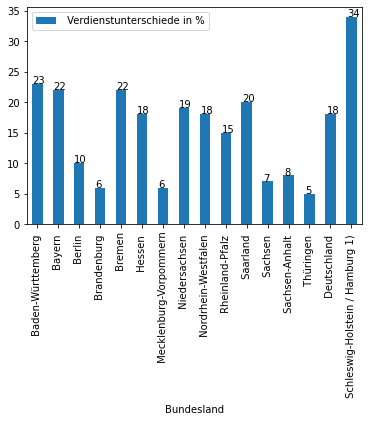

In [57]:
#first, I'm creating bar plots to show the differences in pay per state and year starting in 2020
y20 = proportion_gap_final.loc[proportion_gap_final['Jahr'] == 2020]
ax = y20.plot(x = 'Bundesland', y = ' Verdienstunterschiede in %', kind = 'bar')
#code snippet from https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots to show values per plot
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

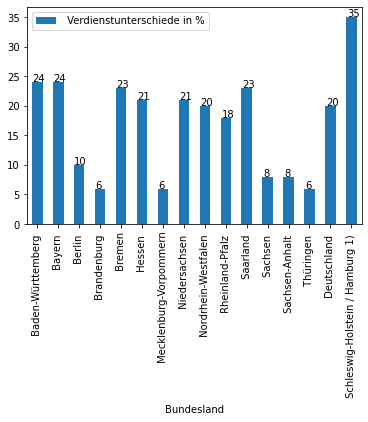

In [58]:
#2018
y18 = proportion_gap_final.loc[proportion_gap_final['Jahr'] == 2018]
ax = y18.plot(x = 'Bundesland', y = ' Verdienstunterschiede in %', kind = 'bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

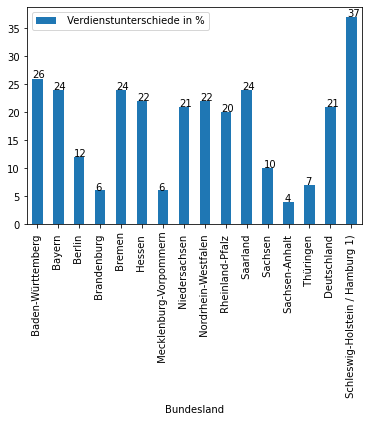

In [59]:
#2016
y16 = proportion_gap_final.loc[proportion_gap_final['Jahr'] == 2016]
ax = y16.plot(x = 'Bundesland', y = ' Verdienstunterschiede in %', kind = 'bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

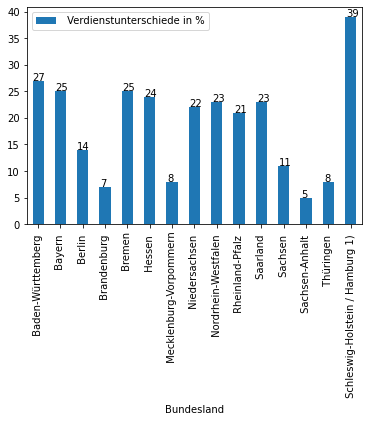

In [60]:
#2014
y14 = proportion_gap_final.loc[proportion_gap_final['Jahr'] == 2014]
ax = y14.plot(x = 'Bundesland', y = ' Verdienstunterschiede in %', kind = 'bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

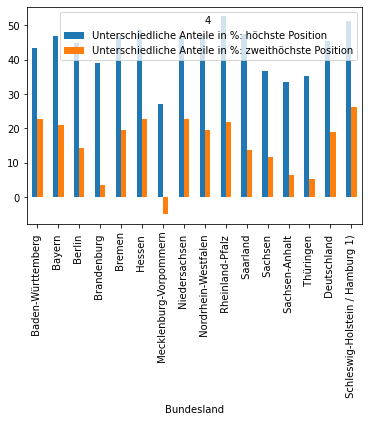

In [61]:
#now I'm plotting the different proportions of women and men in companys, starting again in 2020
diff20 = proportion_gap_final.loc[proportion_gap_final['Jahr'] == 2020]
ax = diff20.plot(x = 'Bundesland', y = ['Unterschiedliche Anteile in %: höchste Position', 'Unterschiedliche Anteile in %: zweithöchste Position'], kind = 'bar')
plt.show()
#the outlier for Mecklenburg-Vorpommern is a result of more women then men working in this position 

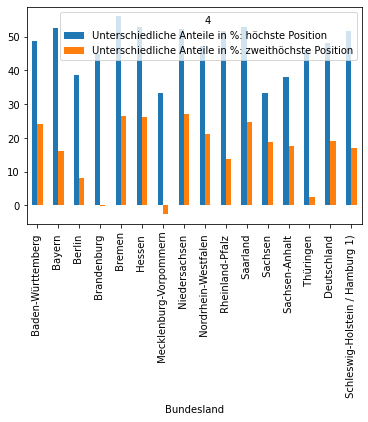

In [62]:
#2018
diff18 = proportion_gap_final.loc[proportion_gap_final['Jahr'] == 2018]
ax = diff18.plot(x = 'Bundesland', y = ['Unterschiedliche Anteile in %: höchste Position', 'Unterschiedliche Anteile in %: zweithöchste Position'], kind = 'bar')
plt.show()
#the outlier for Mecklenburg-Vorpommern is a result of more women then men working in this position 

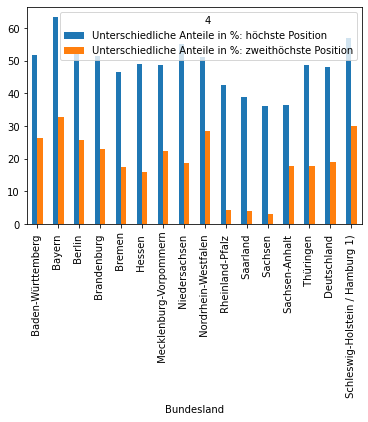

In [63]:
#2016
diff16 = proportion_gap_final.loc[proportion_gap_final['Jahr'] == 2016]
ax = diff16.plot(x = 'Bundesland', y = ['Unterschiedliche Anteile in %: höchste Position', 'Unterschiedliche Anteile in %: zweithöchste Position'], kind = 'bar')
plt.show()

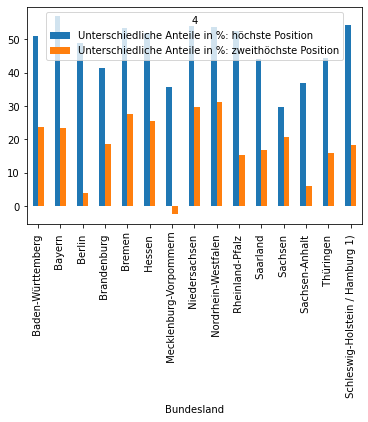

In [64]:
#2014
diff14 = proportion_gap_final.loc[proportion_gap_final['Jahr'] == 2014]
ax = diff14.plot(x = 'Bundesland', y = ['Unterschiedliche Anteile in %: höchste Position', 'Unterschiedliche Anteile in %: zweithöchste Position'], kind = 'bar')
plt.show()
#the outlier for Mecklenburg-Vorpommern is a result of more women then men working in this position 

In [65]:
#here I'm using some filters to create an interactive representation of the data.
#Code from: https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916
ALL = 'Choose..'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [66]:
#here you can filter by year. to make it work, you need to first run this cell AND the next cell w/ display(output_year)
dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(proportion_gap_final.Jahr))

output_year = widgets.Output()

def dropdown_year_eventhandler(change):
    output_year.clear_output()
    with output_year:
        display(proportion_gap_final[proportion_gap_final.Jahr == change.new])
        
dropdown_year.observe(dropdown_year_eventhandler, names='value')

display(dropdown_year)

Dropdown(options=('Choose..', 2014, 2016, 2018, 2020), value='Choose..')

In [67]:
display(output_year)

Output()

In [68]:
#here you can filter by state, same thing that you need to run the next cell befor choosing sth so you can see the output
dropdown_state = widgets.Dropdown(options = unique_sorted_values_plus_ALL(proportion_gap_final.Bundesland))

output_state = widgets.Output()

def dropdown_state_eventhandler(change):
    output_state.clear_output()
    with output_state:
        display(proportion_gap_final[proportion_gap_final.Bundesland == change.new])
        
dropdown_state.observe(dropdown_state_eventhandler, names='value')

display(dropdown_state)

Dropdown(options=('Choose..', ' Baden-Württemberg ', ' Bayern ', ' Berlin ', ' Brandenburg ', ' Bremen', ' Deu…

In [69]:
display(output_state)

Output()

In [70]:
#here you can combine both options
output = widgets.Output()

dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(proportion_gap_final.Jahr))
dropdown_state = widgets.Dropdown(options = unique_sorted_values_plus_ALL(proportion_gap_final.Bundesland))

def common_filtering(Jahr, Bundesland):
    output.clear_output()
    if (Jahr == ALL) & (Bundesland == ALL):
        common_filter = proportion_gap_final
    elif (Jahr == ALL):
        common_filter = proportion_gap_final[proportion_gap_final.Bundesland == Bundesland]
    elif (Bundesland == ALL):
        common_filter = proportion_gap_final[proportion_gap_final.Jahr == Jahr]
    else:
        common_filter = proportion_gap_final[(proportion_gap_final.Jahr == Jahr) & 
                                  (proportion_gap_final.Bundesland == Bundesland)]
        
    with output:
        display(common_filter)
        
def dropdown_year_eventhandler(change):
    common_filtering(change.new, dropdown_state.value)
def dropdown_state_eventhandler(change):
    common_filtering(dropdown_year.value, change.new)
    
dropdown_year.observe(
dropdown_year_eventhandler, names='value')
dropdown_state.observe(
dropdown_state_eventhandler, names='value')

display(dropdown_year)
display(dropdown_state)

Dropdown(options=('Choose..', 2014, 2016, 2018, 2020), value='Choose..')

Dropdown(options=('Choose..', ' Baden-Württemberg ', ' Bayern ', ' Berlin ', ' Brandenburg ', ' Bremen', ' Deu…

In [72]:
display(output)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '4 Länderschlüssel             Bundesla…